In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Chargement des données
iris = datasets.load_iris()
print (iris.data.shape)
#Standarisation des données
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

(150, 4)


In [5]:
#On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)

In [6]:
gamma=[0.01,0.1,1,10,100]
c=[0.01,0.1,1,10,100]
for i in range (len (gamma)):
    print( "Pour gamma = "+str (gamma[i])+ ":" )
    for j in range (len (c)):
        clf = svm.SVC(C=c[j],kernel='rbf', gamma=gamma[i])
        clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        print ("le score pour une valeur de c ="+str(c[j])+ " est de : " +str(clf.score(X_test, y_test)))

Pour gamma = 0.01:
le score pour une valeur de c =0.01 est de : 0.28
le score pour une valeur de c =0.1 est de : 0.28
le score pour une valeur de c =1 est de : 0.8133333333333334
le score pour une valeur de c =10 est de : 0.9466666666666667
le score pour une valeur de c =100 est de : 0.9333333333333333
Pour gamma = 0.1:
le score pour une valeur de c =0.01 est de : 0.28
le score pour une valeur de c =0.1 est de : 0.7333333333333333
le score pour une valeur de c =1 est de : 0.9333333333333333
le score pour une valeur de c =10 est de : 0.9466666666666667
le score pour une valeur de c =100 est de : 0.96
Pour gamma = 1:
le score pour une valeur de c =0.01 est de : 0.28
le score pour une valeur de c =0.1 est de : 0.7466666666666667
le score pour une valeur de c =1 est de : 0.9066666666666666
le score pour une valeur de c =10 est de : 0.92
le score pour une valeur de c =100 est de : 0.92
Pour gamma = 10:
le score pour une valeur de c =0.01 est de : 0.28
le score pour une valeur de c =0.1 est 

Text(0.5, 1.0, 'SVM RBF')

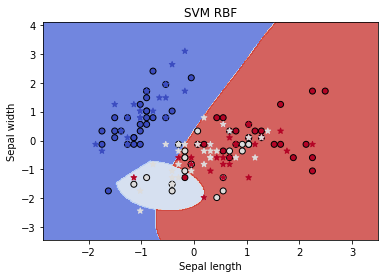

In [7]:
X, y = iris.data[:,:2], iris.target
#Standarisation des données
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
#Standarisation des données
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

(1797, 64)
(1797,)


In [9]:
gamma=[0.01,0.1,1,10,100,'auto','scale']
print( "le score pour classification par une SVM à noyau gaussien et la valeur de c "+str(100)+ ":" )
#classification par une SVM à noyau gaussien : 
for i in range (len (gamma)):
        clf = svm.SVC(C=100,kernel='rbf', gamma=gamma[i])
        clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        print ("le score pour une valeur de gamma ="+str(gamma[i])+ " est de : " +str(clf.score(X_test, y_test)))
#classification par une SVM linéaire 
clf = svm.LinearSVC(C=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print ("le score pour classification par une SVM linéaire et la valeur de c ="+str(100)+ " est de : " +str(clf.score(X_test, y_test)))

le score pour classification par une SVM à noyau gaussien et la valeur de c 100:
le score pour une valeur de gamma =0.01 est de : 0.9805555555555555
le score pour une valeur de gamma =0.1 est de : 0.9388888888888889
le score pour une valeur de gamma =1 est de : 0.08888888888888889
le score pour une valeur de gamma =10 est de : 0.08055555555555556
le score pour une valeur de gamma =100 est de : 0.08055555555555556
le score pour une valeur de gamma =auto est de : 0.975
le score pour une valeur de gamma =scale est de : 0.975
le score pour classification par une SVM linéaire et la valeur de c =100 est de : 0.9333333333333333


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


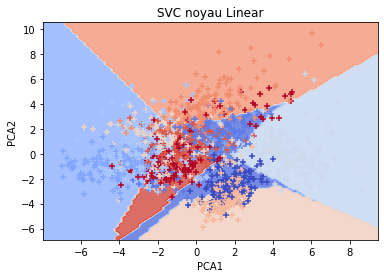

In [10]:
#classification par une SVM à noyau gaussien : 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ACP
pca = PCA(n_components=2)
X_s = pca.fit_transform(X_train)


svc = svm.SVC(kernel='linear', C=100).fit(X_s, y_train)
   
# Créer la surface de décision 
x_min, x_max = X_s[:, 0].min() - 1, X_s[:, 0].max() + 1
y_min, y_max = X_s[:, 1].min() - 1, X_s[:, 1].max() + 1
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
title = 'SVC noyau Linear'

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points 
plt.scatter(X_s[:, 0], X_s[:, 1], c=y_train, marker='+', cmap=plt.cm.coolwarm)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(title)
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()
# En supposant que l'on se concentre sur une SVM RBF
svc = svm.SVC(kernel='rbf', gamma='scale')
pipe = Pipeline(steps=[('pca', pca), ('svm', svc)])

# Syntaxe : nomdustep__nomduparamètre
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'svm__C': [0.1, 1.0, 10, 100],
}
search = GridSearchCV(pipe, param_grid, n_jobs=4, verbose=1)
search.fit(X_train, y_train)
print(search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   55.8s finished


{'pca__n_components': 30, 'svm__C': 10}


In [19]:
pca = PCA(n_components=28)
svc = svm.SVC(kernel='rbf', gamma='scale')
pipe = Pipeline(steps=[('pca', pca), ('svc', svc)])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))


0.9722222222222222
